# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Daru Adiyatma Rauf
- Email: darurauf@gmail.com
- Id Dicoding: Daru Adiyatma Rauf

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Menyiapkan data yang akan diguankan

## Data Understanding

In [3]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/employee_data.csv'
data = pd.read_csv(data_path)
data.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-nu

In [4]:
data.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


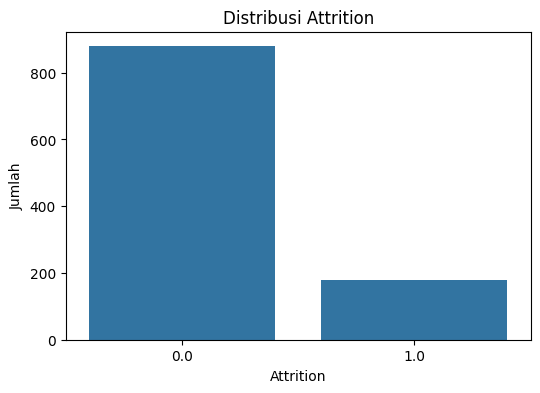

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Attrition')
plt.title('Distribusi Attrition')
plt.xlabel('Attrition')
plt.ylabel('Jumlah')
plt.show()

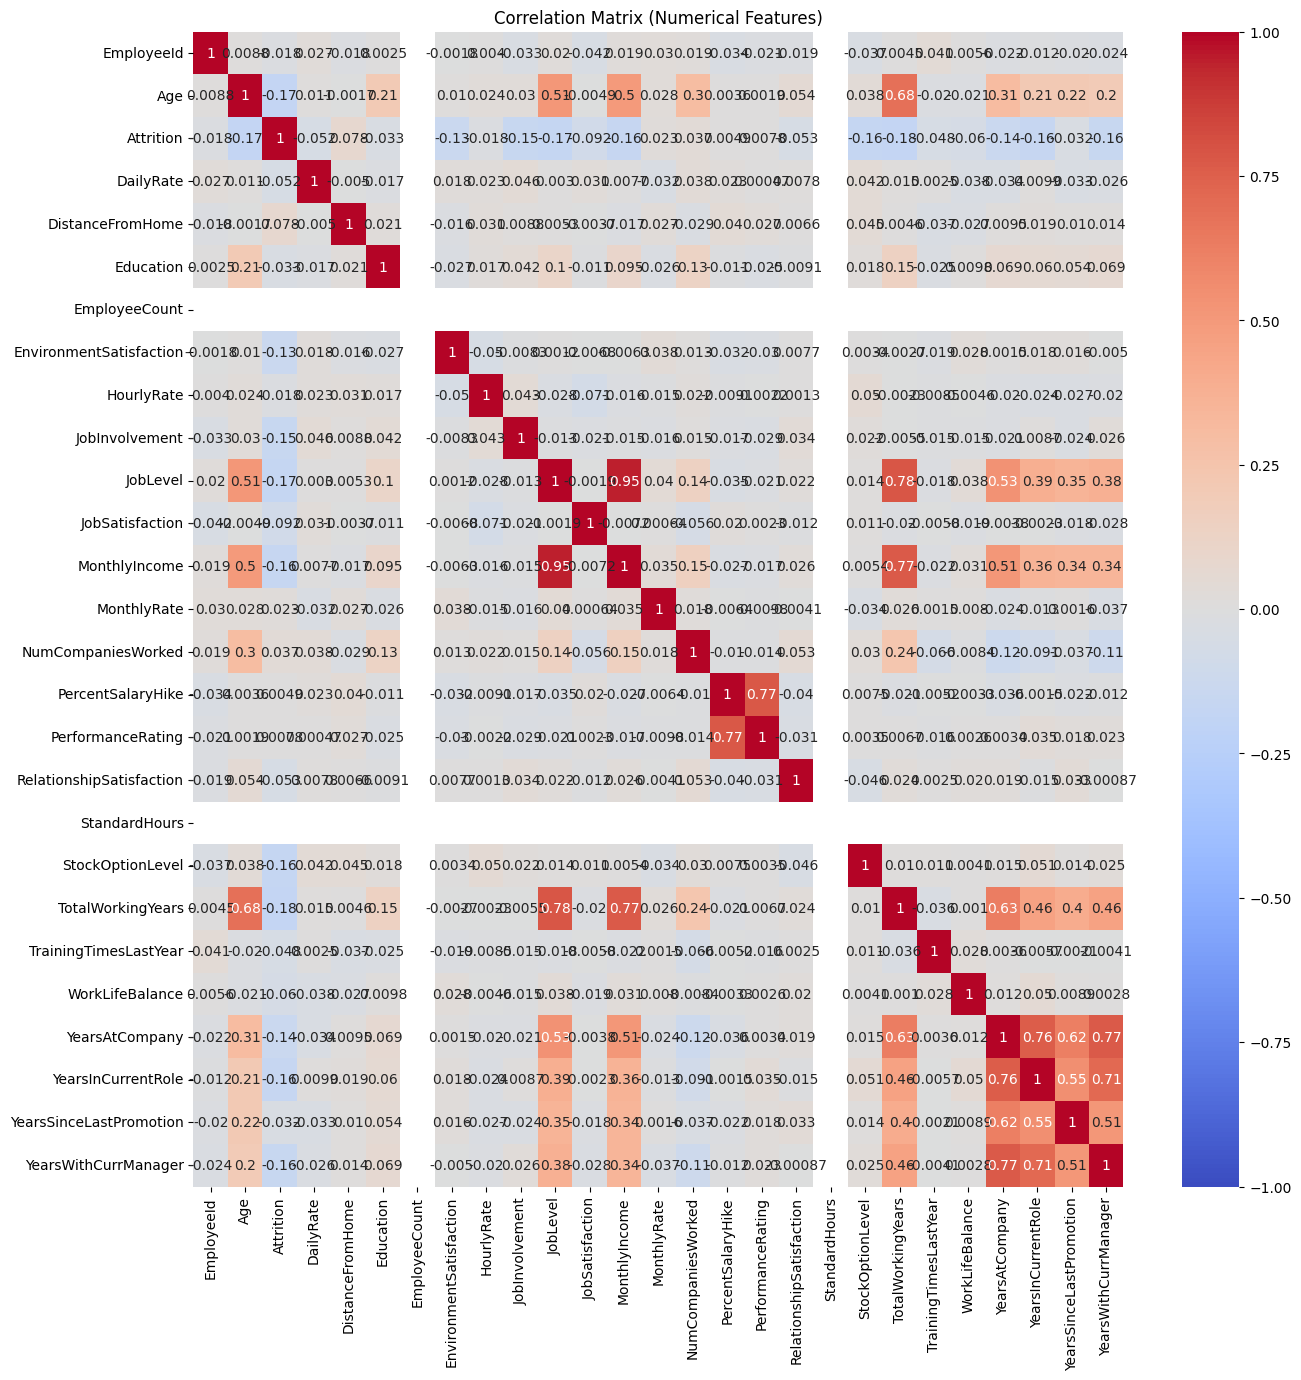

In [6]:
# Filter kolom numerik saja
numerical_columns = data.select_dtypes(include=[np.number])

# Hitung korelasi hanya untuk kolom numerik
corr_matrix = numerical_columns.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


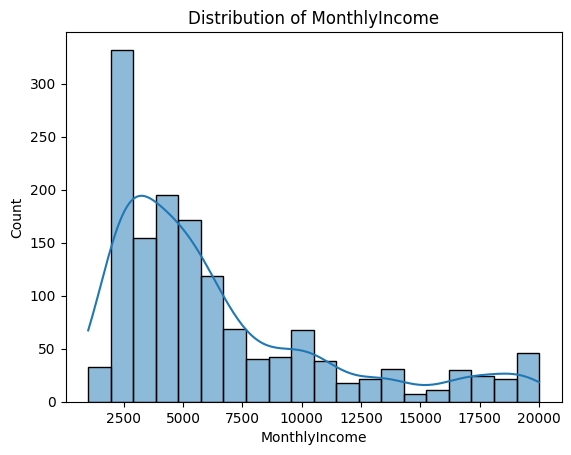

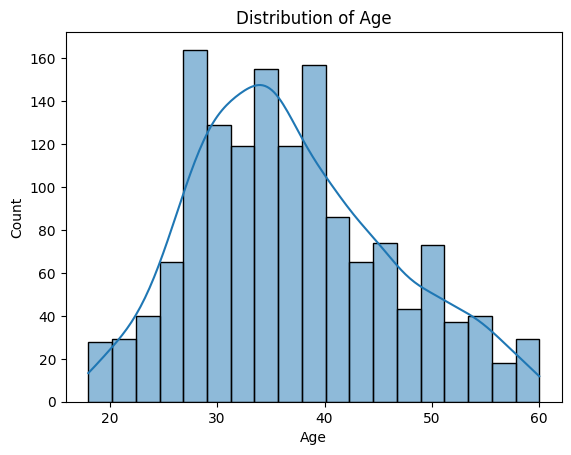

In [12]:
sns.histplot(data['MonthlyIncome'], kde=True)
plt.title('Distribution of MonthlyIncome')
plt.show()

sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()


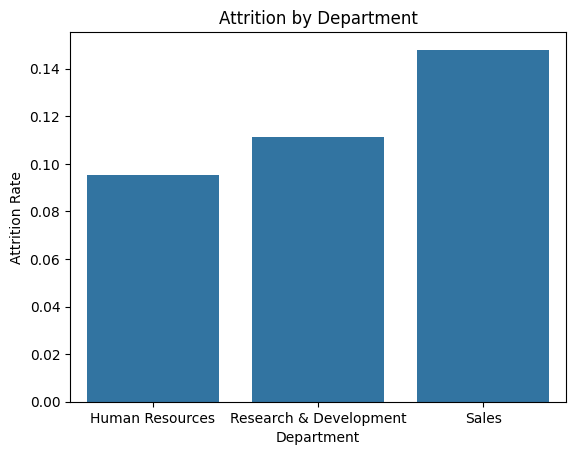

In [15]:
department_attrition = data.groupby('Department')['Attrition'].mean().sort_values()

sns.barplot(x=department_attrition.index, y=department_attrition.values)
plt.title('Attrition by Department')
plt.ylabel('Attrition Rate')
plt.xticks()
plt.show()

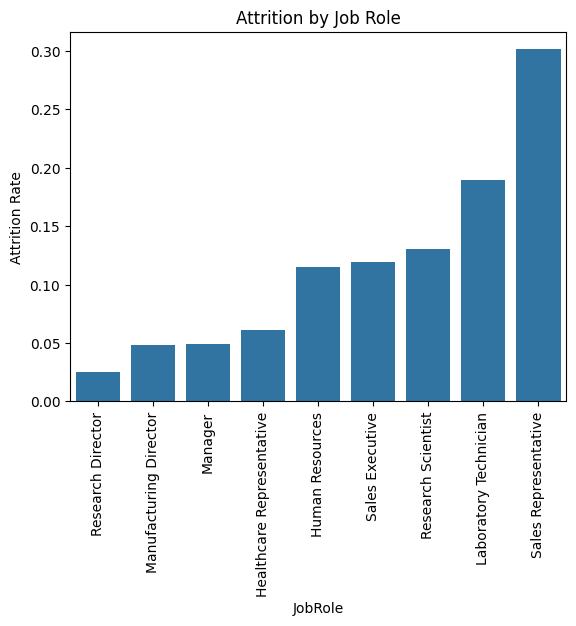

In [16]:
jobrole_attrition = data.groupby('JobRole')['Attrition'].mean().sort_values()

sns.barplot(x=jobrole_attrition.index, y=jobrole_attrition.values)
plt.title('Attrition by Job Role')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=90)
plt.show()

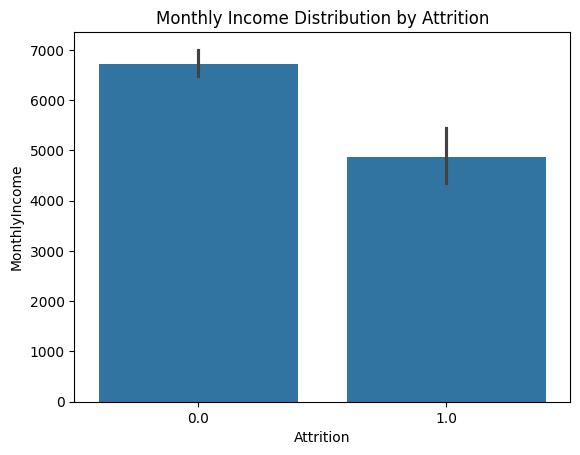

In [18]:
sns.barplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Monthly Income Distribution by Attrition')
plt.show()

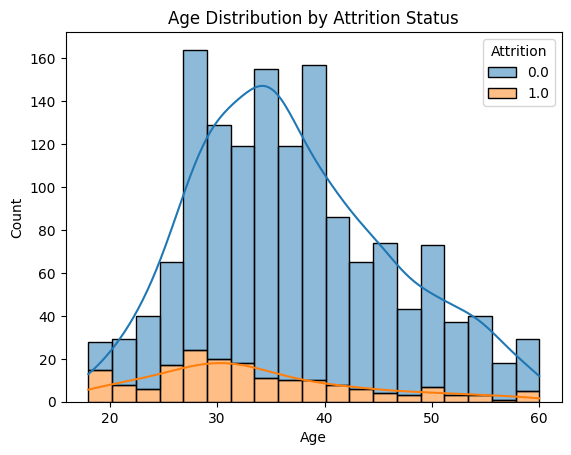

In [19]:
sns.histplot(data=data, x='Age', hue='Attrition', multiple='stack', kde=True)
plt.title('Age Distribution by Attrition Status')
plt.show()

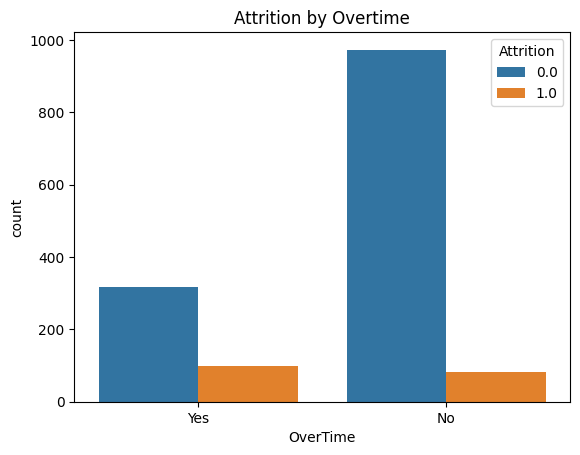

In [21]:
sns.countplot(x='OverTime', hue='Attrition', data=data)
plt.title('Attrition by Overtime')
plt.show()


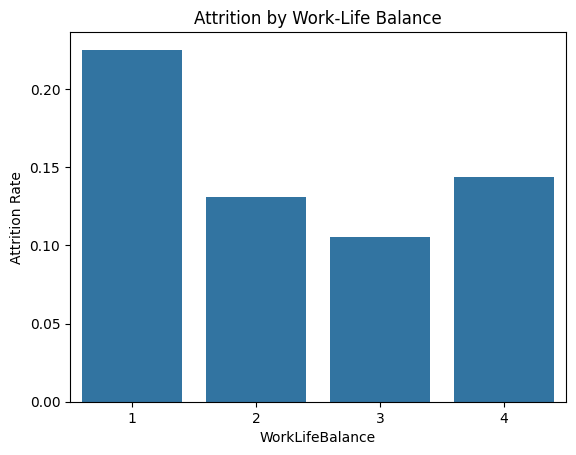

In [24]:
worklife_attrition = data.groupby('WorkLifeBalance')['Attrition'].mean()

sns.barplot(x=worklife_attrition.index, y=worklife_attrition.values)
plt.title('Attrition by Work-Life Balance')
plt.ylabel('Attrition Rate')
plt.show()

## Data Preparation / Preprocessing

In [7]:
# Menangani missing values
data['Attrition'].fillna(data['Attrition'].mode()[0], inplace=True)

# Encoding fitur kategorikal (konversi ke numerik)
data_encoded = pd.get_dummies(data, drop_first=True)

# Normalisasi fitur numerik jika diperlukan
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ['Age', 'MonthlyIncome', 'DistanceFromHome']  # Contoh kolom numerik
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Membagi data menjadi fitur dan label
X = data_encoded.drop('Attrition', axis=1)
y = data_encoded['Attrition']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-7-424320ec7de4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Attrition'].fillna(data['Attrition'].mode()[0], inplace=True)


## Modeling

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

In [9]:
# Prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       262
         1.0       0.50      0.06      0.11        32

    accuracy                           0.89       294
   macro avg       0.70      0.53      0.53       294
weighted avg       0.85      0.89      0.85       294

Confusion Matrix:
 [[260   2]
 [ 30   2]]
Accuracy: 0.891156462585034


In [10]:
!pip freeze > requirements.txt

from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>